In [130]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Elizabeth341/Estadistica/refs/heads/main/Churn_Modelling.csv")
df.dropna(inplace = True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [131]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


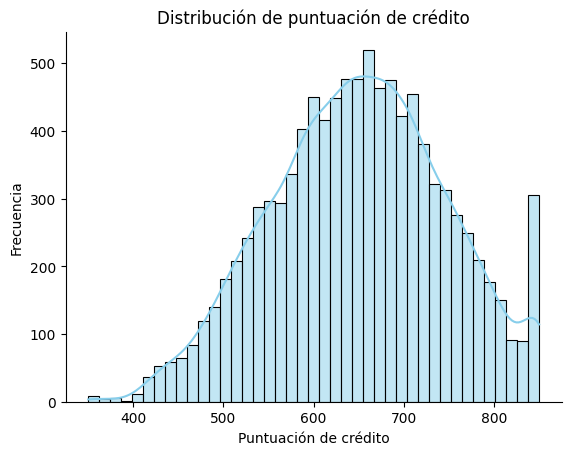

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CreditScore'], kde = True, color = 'skyblue')

plt.xlabel('Puntuación de crédito')
plt.ylabel('Frecuencia')
plt.title('Distribución de puntuación de crédito')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [133]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [134]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(Geography)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Geography),2.0,3.782055e+09,1.891028e+09,0.571689,0.56459
Residual,9995.0,3.306138e+13,3.307792e+09,NaN,NaN


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2  meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------
 France Germany  1194.7643 0.6721 -2101.7906 4491.3192  False
 France   Spain  -466.6001 0.9416 -3778.2019 2845.0016  False
Germany   Spain -1661.3644 0.5643 -5479.9278 2157.1989  False
-------------------------------------------------------------


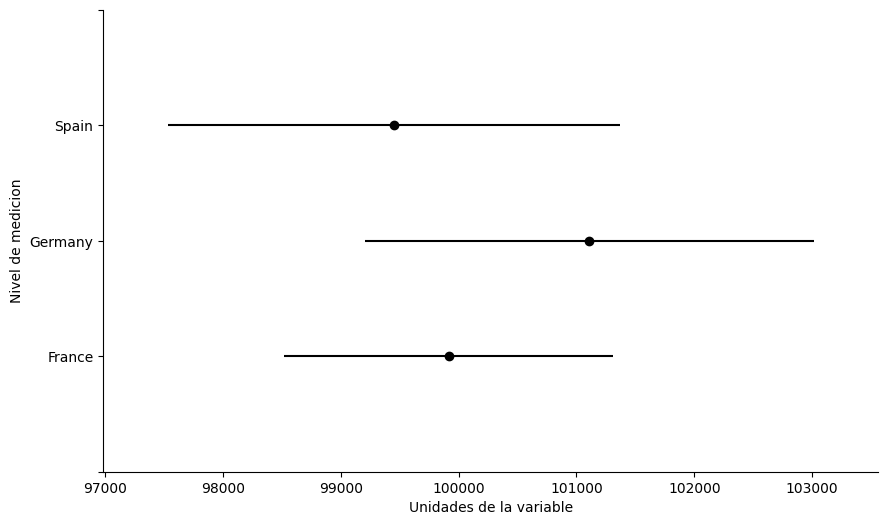

In [135]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['EstimatedSalary'], groups = df['Geography'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [136]:
df.drop(columns = ['Geography'], inplace = True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...
9997,709,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [137]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(Gender)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,2.021718e+09,2.021718e+09,0.611227,0.434345
Residual,9996.0,3.306314e+13,3.307637e+09,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
Female   Male -903.1255 0.4343 -3167.4956 1361.2446  False
----------------------------------------------------------


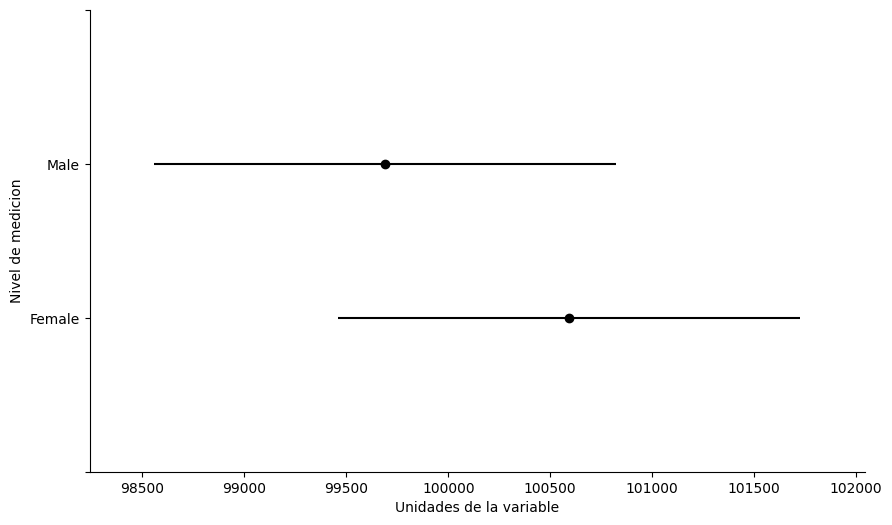

In [138]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['EstimatedSalary'], groups = df['Gender'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [139]:
df.drop(columns = ['Gender'], inplace = True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


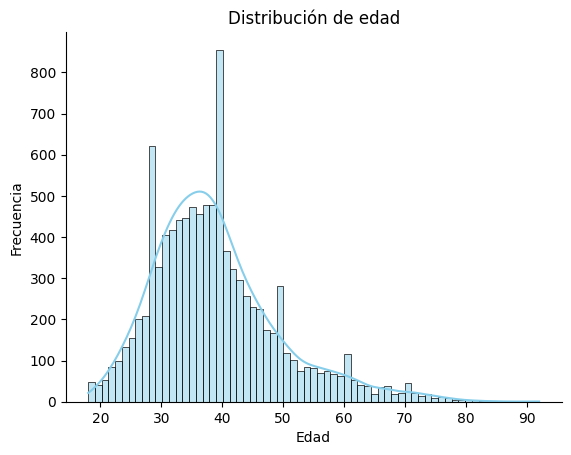

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde = True, color = 'skyblue')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [141]:
df['Tenure'].unique()

array([ 2,  1,  8,  4,  6,  3, 10,  5,  7,  9,  0])

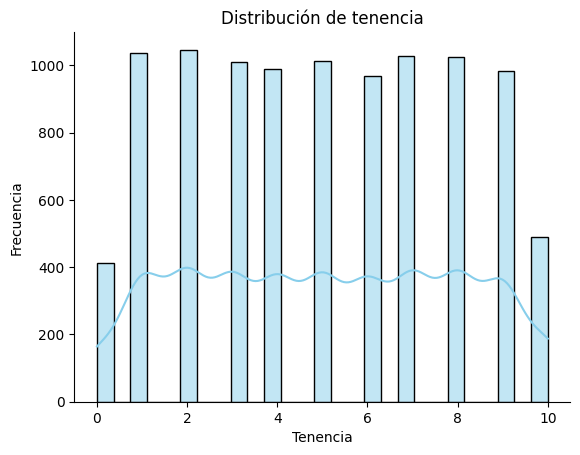

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tenure'], kde = True, color = 'skyblue')

plt.xlabel('Tenencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de tenencia')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

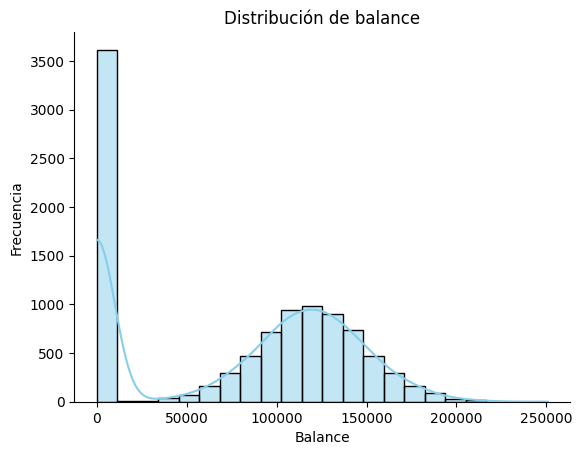

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Balance'], kde = True, color = 'skyblue')

plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.title('Distribución de balance')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [144]:
df=df.loc[df["Balance"]!= 0,:]
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,528,31.0,6,102016.72,2,0.0,0.0,80181.12,0
...,...,...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


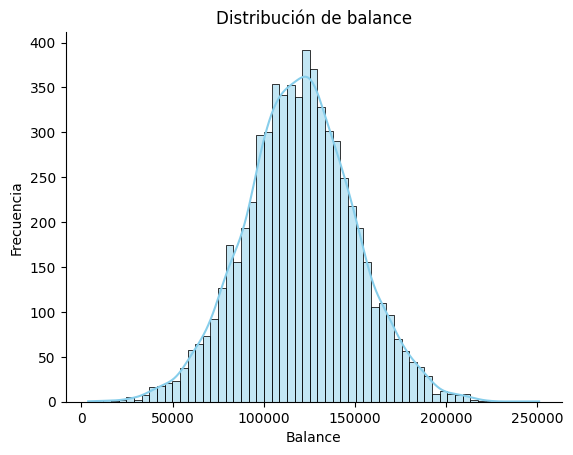

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Balance'], kde = True, color = 'skyblue')

plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.title('Distribución de balance')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [146]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(NumOfProducts)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(NumOfProducts),3.0,1.666167e+10,5.553889e+09,1.68695,0.16751
Residual,6378.0,2.099808e+13,3.292267e+09,NaN,NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff p-adj     lower      upper    reject
------------------------------------------------------------
     1      2 2604.7549 0.3415  -1411.2375  6620.7472  False
     1      3  7607.176 0.3317  -3994.9468 19209.2987  False
     1      4   1794.74 0.9967 -20064.2593 23653.7392  False
     2      3 5002.4211 0.6987  -6843.6953 16848.5375  False
     2      4 -810.0149 0.9997 -22799.4912 21179.4614  False
     3      4 -5812.436 0.9293 -30348.4937 18723.6217  False
------------------------------------------------------------


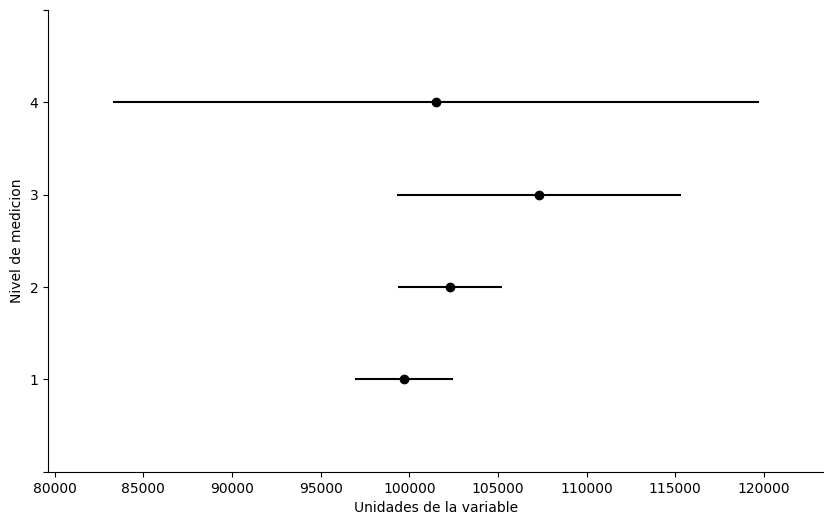

In [147]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['EstimatedSalary'], groups = df['NumOfProducts'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [148]:
df.drop(columns = ['NumOfProducts'], inplace = True)
df

<ipython-input-148-e6f9a6fe47a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['NumOfProducts'], inplace = True)


,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,1.0,0.0,113931.57,1
5,645,44.0,8,113755.78,1.0,0.0,149756.71,1
7,376,29.0,4,115046.74,1.0,0.0,119346.88,1
10,528,31.0,6,102016.72,0.0,0.0,80181.12,0
...,...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1.0,1.0,101699.77,0
9998,772,42.0,3,75075.31,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1.0,0.0,38190.78,0


In [149]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(HasCrCard)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(HasCrCard),1.0,4.315124e+08,4.315124e+08,0.131008,0.717401
Residual,6380.0,2.101431e+13,3.293778e+09,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
   0.0    1.0 -567.0536 0.7174 -3638.2327 2504.1255  False
----------------------------------------------------------


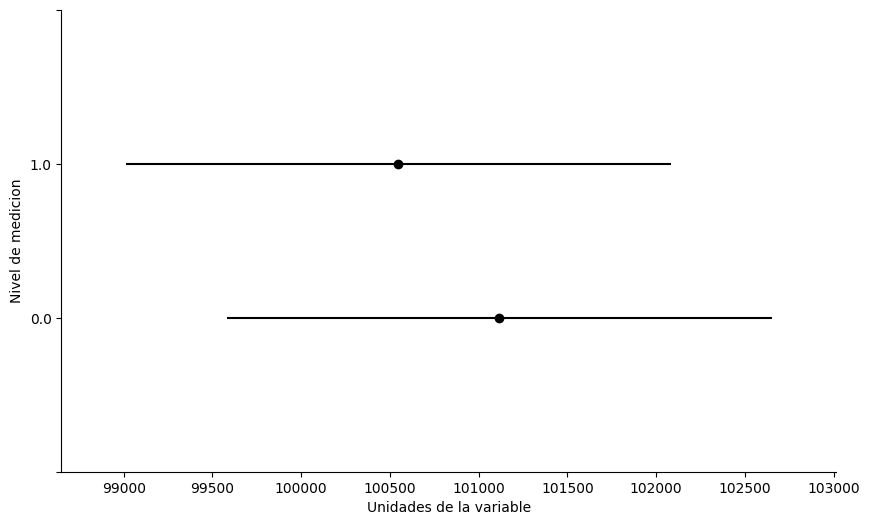

In [150]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['EstimatedSalary'], groups = df['HasCrCard'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [151]:
df.drop(columns = ['HasCrCard'], inplace = True)
df

<ipython-input-151-6c784122fd6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['HasCrCard'], inplace = True)


,CreditScore,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,1.0,112542.58,0
2,502,42.0,8,159660.80,0.0,113931.57,1
5,645,44.0,8,113755.78,0.0,149756.71,1
7,376,29.0,4,115046.74,0.0,119346.88,1
10,528,31.0,6,102016.72,0.0,80181.12,0
...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1.0,101699.77,0
9998,772,42.0,3,75075.31,0.0,92888.52,1
9999,772,42.0,3,75075.31,0.0,92888.52,1
10000,792,28.0,4,130142.79,0.0,38190.78,0


In [152]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(IsActiveMember)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(IsActiveMember),1.0,3.677991e+09,3.677991e+09,1.116821,0.290644
Residual,6380.0,2.101106e+13,3.293270e+09,NaN,NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   0.0    1.0 -1518.8241 0.2906 -4336.2094 1298.5613  False
-----------------------------------------------------------


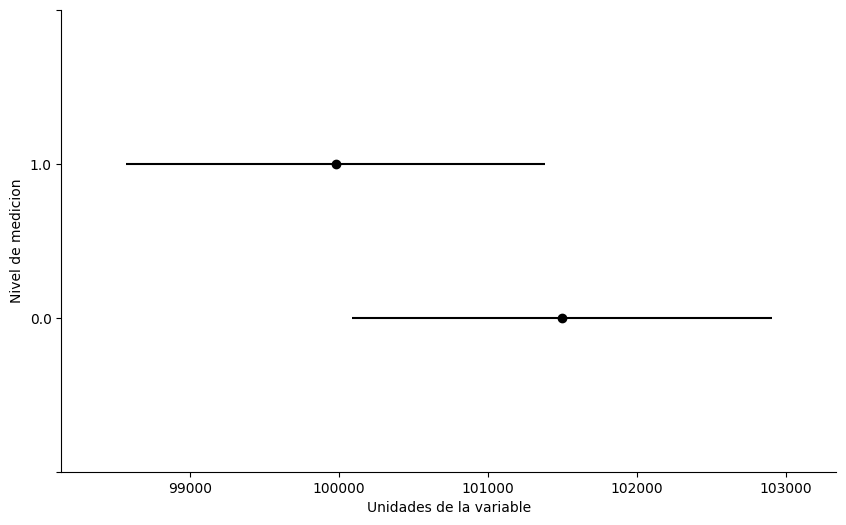

In [153]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['EstimatedSalary'], groups = df['IsActiveMember'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [154]:
df.drop(columns = ['IsActiveMember'], inplace = True)
df

<ipython-input-154-847c72a0fe9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['IsActiveMember'], inplace = True)


,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
1,608,41.0,1,83807.86,112542.58,0
2,502,42.0,8,159660.80,113931.57,1
5,645,44.0,8,113755.78,149756.71,1
7,376,29.0,4,115046.74,119346.88,1
10,528,31.0,6,102016.72,80181.12,0
...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,101699.77,0
9998,772,42.0,3,75075.31,92888.52,1
9999,772,42.0,3,75075.31,92888.52,1
10000,792,28.0,4,130142.79,38190.78,0


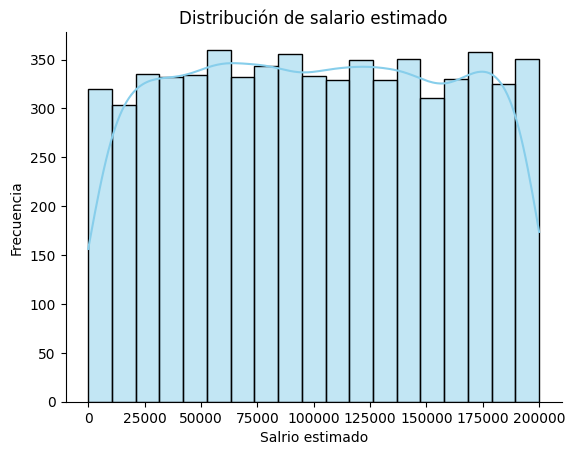

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['EstimatedSalary'], kde = True, color = 'skyblue')

plt.xlabel('Salrio estimado')
plt.ylabel('Frecuencia')
plt.title('Distribución de salario estimado')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [156]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(Exited)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Exited),1.0,8.272243e+08,8.272243e+08,0.251152,0.616282
Residual,6380.0,2.101391e+13,3.293716e+09,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     0      1 841.8017 0.6163 -2451.0468 4134.6502  False
---------------------------------------------------------


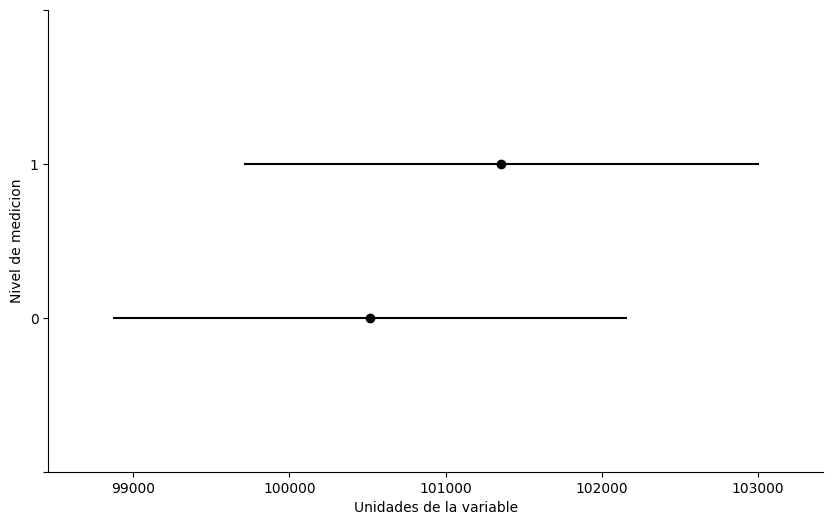

In [157]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['EstimatedSalary'], groups = df['Exited'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [158]:
df.drop(columns = ['Exited'], inplace = True)
df

<ipython-input-158-ce5553c30d3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Exited'], inplace = True)


,CreditScore,Age,Tenure,Balance,EstimatedSalary
1,608,41.0,1,83807.86,112542.58
2,502,42.0,8,159660.80,113931.57
5,645,44.0,8,113755.78,149756.71
7,376,29.0,4,115046.74,119346.88
10,528,31.0,6,102016.72,80181.12
...,...,...,...,...,...
9996,516,35.0,10,57369.61,101699.77
9998,772,42.0,3,75075.31,92888.52
9999,772,42.0,3,75075.31,92888.52
10000,792,28.0,4,130142.79,38190.78


Text(0.5, 1.0, 'Matriz de correlacion')

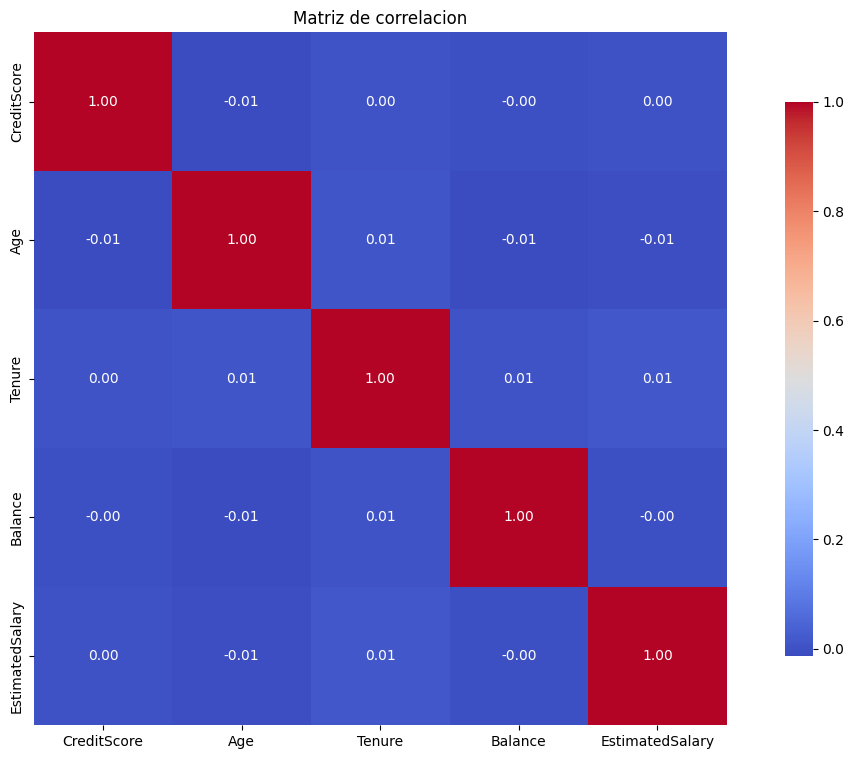

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de correlacion')

Coeficiente de determinacion: -0.0012


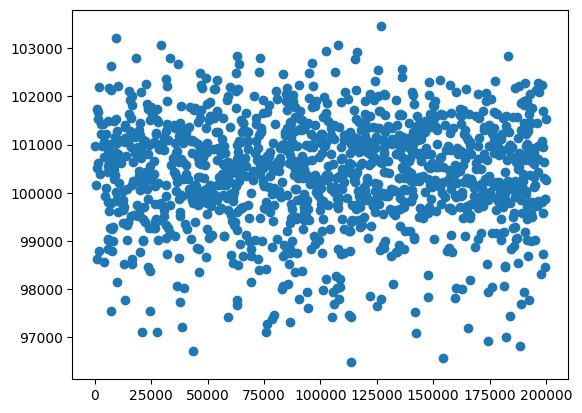

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['CreditScore', 'Age', 'Tenure', 'Balance']]
Y = df['EstimatedSalary']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')

In [161]:
b0, b1, b2, b3, b4 = modelo.params

Fun = lambda X1, X2, X3, X4: b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4

Fun(700, 40, 5, 135000)

100492.85171236204

In [162]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(f'Valor-p de Breusch-Pagan: {valor_p_bp: 0.4f}')

# Se acepta la hipótesis nula

Valor-p de Breusch-Pagan:  0.6030


In [163]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'EstimatedSalary ~ CreditScore + Age + Tenure + Balance', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

# Los valores de la tabla son muy altos lo cual nos hace aceptar la hipótesis nula y por ende concluir que no hay relación

,sum_sq,df,F,PR(>F)
CreditScore,8.826550e+05,1.0,0.000268,0.986941
Age,1.548042e+09,1.0,0.469869,0.493072
Tenure,3.339433e+09,1.0,1.013600,0.314080
Balance,8.135894e+07,1.0,0.024694,0.875136
Residual,2.100982e+13,6377.0,NaN,NaN


In [164]:
'''

['RowNumber',
 'CustomerId',
 'Surname', Estas primeras tres variables RowNumber, CustomerId y Surname se eliminan debido a que no son de importancia

'CreditScore', Disribución aproximadamente normal

 'Geography', No hay diferencia entre grupos

 'Gender', No hay diferencia entre grupos

 'Age', Disribución aproximadamente normal

 'Tenure', Distribución normal, no se muestran datos atipicos

 'Balance', Disribución aproximadamente normal, se muestran datos atipicos

 'NumOfProducts', No hay diferencia entre grupos

 'HasCrCard', No hay diferencia entre grupos

 'IsActiveMember', No hay diferencia entre grupos

 'EstimatedSalary', Distribución normal, no se muestran datos atipicos

 'Exited' No hay diferencia entre grupos]


 '''

"\n\n['RowNumber',\n 'CustomerId',\n 'Surname', Estas primeras tres variables RowNumber, CustomerId y Surname se eliminan debido a que no son de importancia\n\n'CreditScore', Disribución aproximadamente normal\n\n 'Geography', No hay diferencia entre grupos\n\n 'Gender', No hay diferencia entre grupos\n\n 'Age', Disribución aproximadamente normal\n\n 'Tenure', Distribución normal, no se muestran datos atipicos\n\n 'Balance', Disribución aproximadamente normal, se muestran datos atipicos\n\n 'NumOfProducts', No hay diferencia entre grupos\n\n 'HasCrCard', No hay diferencia entre grupos\n\n 'IsActiveMember', No hay diferencia entre grupos\n\n 'EstimatedSalary', Distribución normal, no se muestran datos atipicos\n\n 'Exited' No hay diferencia entre grupos]\n\n\n "